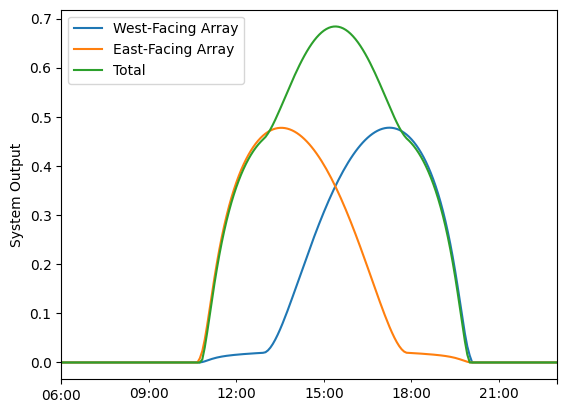

In [14]:
from pvlib import pvsystem, modelchain, location
import pandas as pd
import matplotlib.pyplot as plt

array_kwargs = dict(
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3)
)

# array_kwargs = pvsystem.Array(mount=DualAxisTrackerMount(),
#     module_parameters=dict(pdc0=1, gamma_pdc=-0.004, b=0.05),
#     temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3))

arrays = [
    pvsystem.Array(pvsystem.FixedMount(30, 270), name='West-Facing Array',
                   **array_kwargs),
    pvsystem.Array(pvsystem.FixedMount(30, 90), name='East-Facing Array',
                   **array_kwargs)
]
loc = location.Location(40, -80)
system = pvsystem.PVSystem(arrays=arrays, inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, aoi_model='physical',
                           spectral_model='no_loss')

times = pd.date_range('2019-01-01 06:00', '2019-01-01 23:00', freq='5min',
                      tz='Etc/GMT+2')
weather = loc.get_clearsky(times)
mc.run_model(weather)

fig, ax = plt.subplots()
for array, pdc in zip(system.arrays, mc.results.dc):
    pdc.plot(label=f'{array.name}')
mc.results.ac.plot(label='Total')
plt.ylabel('System Output')
plt.legend()
plt.show()

# class DualAxisTrackerMount(pvsystem.AbstractMount):
#     def get_orientation(self, solar_zenith, solar_azimuth):
#         # no rotation limits, no backtracking
#         return {'surface_tilt': solar_zenith, 'surface_azimuth': solar_azimuth}


# loc = location.Location(40, -80)
# array = pvsystem.Array(
#     mount=DualAxisTrackerMount(),
#     module_parameters=dict(pdc0=1, gamma_pdc=-0.004, b=0.05),
#     temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3))
# system = pvsystem.PVSystem(arrays=[array], inverter_parameters=dict(pdc0=3))
# mc = modelchain.ModelChain(system, loc, aoi_model='physical',
#                            spectral_model='no_loss')

# times = pd.date_range('2019-01-01 06:00', '2019-01-01 23:00', freq='5min',
#                       tz='Etc/GMT+2')
# weather = loc.get_clearsky(times)
# mc.run_model(weather)

# mc.results.ac.plot()
# plt.ylabel('Output Power')
# plt.show()

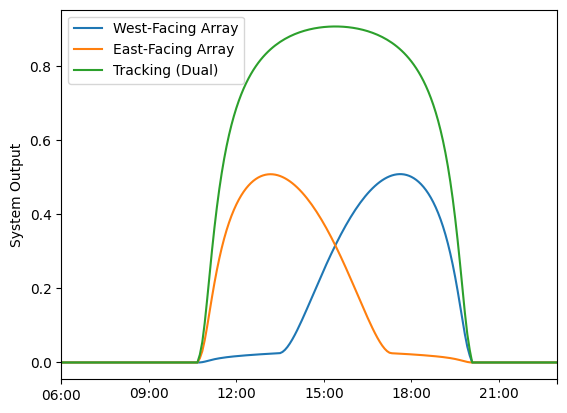

In [24]:
from pvlib import pvsystem, modelchain, location
import pandas as pd
import matplotlib.pyplot as plt

class DualAxisTrackerMount(pvsystem.AbstractMount):
    def get_orientation(self, solar_zenith, solar_azimuth):
        # no rotation limits, no backtracking
        return {'surface_tilt': solar_zenith, 'surface_azimuth': solar_azimuth}


array_kwargs = dict(
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3)
)

# array_kwargs = pvsystem.Array(mount=DualAxisTrackerMount(),
#     module_parameters=dict(pdc0=1, gamma_pdc=-0.004, b=0.05),
#     temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3))

arrays = [
    pvsystem.Array(pvsystem.FixedMount(40, 270), name='West-Facing Array',
                   **array_kwargs),
    pvsystem.Array(pvsystem.FixedMount(40, 90), name='East-Facing Array',
                   **array_kwargs),
    pvsystem.Array(mount=DualAxisTrackerMount(), name='Tracking (Dual)', **array_kwargs)
]
loc = location.Location(40, -80)
system = pvsystem.PVSystem(arrays=arrays, inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, aoi_model='physical',
                           spectral_model='no_loss')

times = pd.date_range('2019-01-01 06:00', '2019-01-01 23:00', freq='5min',
                      tz='Etc/GMT+2')
weather = loc.get_clearsky(times)
mc.run_model(weather)

fig, ax = plt.subplots()
for array, pdc in zip(system.arrays, mc.results.dc):
    pdc.plot(label=f'{array.name}')
# mc.results.ac.plot(label='Total')
plt.ylabel('System Output')
plt.legend()
plt.show()

# class DualAxisTrackerMount(pvsystem.AbstractMount):
#     def get_orientation(self, solar_zenith, solar_azimuth):
#         # no rotation limits, no backtracking
#         return {'surface_tilt': solar_zenith, 'surface_azimuth': solar_azimuth}


# loc = location.Location(40, -80)
# array = pvsystem.Array(
#     mount=DualAxisTrackerMount(),
#     module_parameters=dict(pdc0=1, gamma_pdc=-0.004, b=0.05),
#     temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3))
# system = pvsystem.PVSystem(arrays=[array], inverter_parameters=dict(pdc0=3))
# mc = modelchain.ModelChain(system, loc, aoi_model='physical',
#                            spectral_model='no_loss')

# times = pd.date_range('2019-01-01 06:00', '2019-01-01 23:00', freq='5min',
#                       tz='Etc/GMT+2')
# weather = loc.get_clearsky(times)
# mc.run_model(weather)

# mc.results.ac.plot()
# plt.ylabel('Output Power')
# plt.show()